# Project: TMDb movie data analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

> ## Brif about the dataset:

This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue.

● Certain columns, like ‘cast’
and ‘genres’, contain multiple
values separated by pipe (|)
characters.

● The final two columns ending
with “_adj” show the budget and
revenue of the associated movie
in terms of 2010 dollars,
accounting for inflation over
time.

> ## Research Questions:

+ **Question 1** ( The most popular movie & the less popular movie?)

+ **Question 2** ( The highest cost movie ?)

+ **Question 3** ( The highest Revenue movie ?)

+ **Question 4** ( The highest Profit movie & the lowest profit movie ?)

+ **Question 5** ( The distribution of the number of movies along years & The most production year?)

+ **Question 6** ( The correlation between budget & both revenue & profit?)

+ **Question 7** ( The correlation between Popularity &  profit?)

+ **Question 8**  (What kinds of properties are associated with movies that have high revenues?)

+ **Question 9**  (Which director are most popular ??)

+ **Question 10**  (Which genres are most popular from year to year???)




<a id='wrangling'></a>
# Data Wrangling


### General Properties

In [1]:
#Import needed packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the data & Reviweing it.
df = pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
#explore keywords column
df['keywords']

0        monster|dna|tyrannosaurus rex|velociraptor|island
1         future|chase|post-apocalyptic|dystopia|australia
2        based on novel|revolution|dystopia|sequel|dyst...
3                    android|spaceship|jedi|space opera|3d
4                      car race|speed|revenge|suspense|car
                               ...                        
10861                             surfer|surfboard|surfing
10862                            car race|racing|formula 1
10863                             car|trolley|stealing car
10864                                                spoof
10865                  fire|gun|drive|sacrifice|flashlight
Name: keywords, Length: 10866, dtype: object

In [5]:
# check for duplicated rows
df.duplicated().sum()

1

In [6]:
#check for missing data
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
# check for unique values
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

## Data Cleaning 

### Issues need to clean:
**Issue(1)** 
Drop duplicated columns

**Issue(2)**
Drop columnes which no need for it in analysis ('imdb_id','id','homepage','tagline','keywords','overview','release_date','budget','revenue','production_companies')

**Issue(3)**
Rearrange columns after doing **~~Issue(1)~~** & **~~Issue(2)~~**

**Issue(4)** 
Drop any rows in dataset that contain missing values 

**Issue(5)**  Drop any rows in dataset that contain 0 value in (budget_adj,revenue_adj & runtime)


In [8]:
# Issue(1)
df.drop_duplicates(inplace=True)

# Check 
df.duplicated().sum()

0

In [9]:
# Issue(2)
df.drop(columns=['imdb_id','id','homepage','tagline','keywords','overview','release_date','budget','revenue','production_companies'],inplace=True)

# check
df.head(2)

,popularity,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08


In [10]:
df.shape

(10865, 11)

In [11]:
# Issue(3)
df = df[['original_title','popularity','vote_count','vote_average','runtime','cast','director','genres','budget_adj','revenue_adj','release_year']]

# Check
df.head(2)

,original_title,popularity,vote_count,vote_average,runtime,cast,director,genres,budget_adj,revenue_adj,release_year
0,Jurassic World,32.985763,5562,6.5,124,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,1.379999e+08,1.392446e+09,2015
1,Mad Max: Fury Road,28.419936,6185,7.1,120,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,1.379999e+08,3.481613e+08,2015


In [12]:
df.shape

(10865, 11)

### Assess the data after first 3 Issues of cleaning 

In [13]:
# Ckeck for missing data
df.isnull().sum()

original_title     0
popularity         0
vote_count         0
vote_average       0
runtime            0
cast              76
director          44
genres            23
budget_adj         0
revenue_adj        0
release_year       0
dtype: int64

In [14]:
# Issue(4)
df.dropna(inplace= True)

# check
df.isnull().sum()

original_title    0
popularity        0
vote_count        0
vote_average      0
runtime           0
cast              0
director          0
genres            0
budget_adj        0
revenue_adj       0
release_year      0
dtype: int64

### Inspecting Data Types

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   original_title  10731 non-null  object 
 1   popularity      10731 non-null  float64
 2   vote_count      10731 non-null  int64  
 3   vote_average    10731 non-null  float64
 4   runtime         10731 non-null  int64  
 5   cast            10731 non-null  object 
 6   director        10731 non-null  object 
 7   genres          10731 non-null  object 
 8   budget_adj      10731 non-null  float64
 9   revenue_adj     10731 non-null  float64
 10  release_year    10731 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 1006.0+ KB


#### No need to change any thing in data Type.

In [16]:
# check for unique values
df.nunique()

original_title    10439
popularity        10684
vote_count         1289
vote_average         70
runtime             243
cast              10665
director           5018
genres             2022
budget_adj         2603
revenue_adj        4835
release_year         56
dtype: int64

In [17]:
# check for duplicated values in (original title) column
df[df['original_title'].duplicated()]

,original_title,popularity,vote_count,vote_average,runtime,cast,director,genres,budget_adj,revenue_adj,release_year
1133,Survivor,0.188264,23,4.9,93,Danielle Chuchran|Kevin Sorbo|Rocky Myers|Ruby...,John Lyde,Science Fiction|Action|Fantasy,0.000000e+00,0.000000e+00,2014
1194,Finders Keepers,0.132764,33,4.8,85,Jaime Pressly|Kylie Rogers|Tobin Bell|Patrick ...,Alexander Yellen,Mystery|Thriller|Horror,0.000000e+00,0.000000e+00,2014
1349,Julia,0.398651,10,5.0,117,Jane Fonda|Vanessa Redgrave|Jason Robards|Maxi...,Fred Zinnemann,Drama,0.000000e+00,0.000000e+00,1977
1440,Brothers,1.223786,381,6.7,104,Tobey Maguire|Jake Gyllenhaal|Natalie Portman|...,Jim Sheridan,Drama|Thriller|War,2.642641e+07,4.402879e+07,2009
1513,Home,0.688361,109,7.8,95,Glenn Close|Yann Arthus-Bertrand|Jacques Gambl...,Yann Arthus-Bertrand,Documentary,0.000000e+00,0.000000e+00,2009
...,...,...,...,...,...,...,...,...,...,...,...
10818,Long Weekend,0.047645,17,6.1,92,John Hargreaves|Briony Behets|Mike McEwen|Roy ...,Colin Eggleston,Horror|Thriller|Mystery,0.000000e+00,0.000000e+00,1978
10827,Batman,0.410366,99,5.9,105,Adam West|Burt Ward|Cesar Romero|Burgess Mered...,Leslie H. Martinson,Family|Adventure|Comedy|Science Fiction|Crime,9.256081e+06,0.000000e+00,1966
10849,Gambit,0.206537,14,6.1,109,Michael Caine|Shirley MacLaine|Herbert Lom|Joh...,Ronald Neame,Action|Comedy|Crime,0.000000e+00,0.000000e+00,1966
10853,Alfie,0.163592,26,6.2,114,Michael Caine|Shelley Winters|Millicent Martin...,Lewis Gilbert,Comedy|Drama|Romance,0.000000e+00,0.000000e+00,1966


In [18]:
df.query("original_title == 'Julia'")

,original_title,popularity,vote_count,vote_average,runtime,cast,director,genres,budget_adj,revenue_adj,release_year
1156,Julia,0.240776,17,4.8,95,Ashley C. Williams|Tahyna Tozzi|Jack Noseworth...,Matthew A. Brown,Thriller|Horror,0.000000e+00,2.496157e+03,2014
1349,Julia,0.398651,10,5.0,117,Jane Fonda|Vanessa Redgrave|Jason Robards|Maxi...,Fred Zinnemann,Drama,0.000000e+00,0.000000e+00,1977
3272,Julia,0.281186,10,7.1,138,Tilda Swinton|Kate del Castillo|Aidan Gould|Br...,Erick Zonca,Drama,6.076720e+06,1.316623e+06,2008


In [19]:
df.query("original_title == 'Survivor'")

,original_title,popularity,vote_count,vote_average,runtime,cast,director,genres,budget_adj,revenue_adj,release_year
67,Survivor,2.331636,280,5.4,96,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,James McTeigue,Crime|Thriller|Action,1.839999e+07,0.0,2015
1133,Survivor,0.188264,23,4.9,93,Danielle Chuchran|Kevin Sorbo|Rocky Myers|Ruby...,John Lyde,Science Fiction|Action|Fantasy,0.000000e+00,0.0,2014


#### No need to do thing in the duplicate movies because it's a different movies with same names 

In [20]:
df.head()

,original_title,popularity,vote_count,vote_average,runtime,cast,director,genres,budget_adj,revenue_adj,release_year
0,Jurassic World,32.985763,5562,6.5,124,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,1.379999e+08,1.392446e+09,2015
1,Mad Max: Fury Road,28.419936,6185,7.1,120,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,1.379999e+08,3.481613e+08,2015
2,Insurgent,13.112507,2480,6.3,119,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,1.012000e+08,2.716190e+08,2015
3,Star Wars: The Force Awakens,11.173104,5292,7.5,136,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,1.839999e+08,1.902723e+09,2015
4,Furious 7,9.335014,2947,7.3,137,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,1.747999e+08,1.385749e+09,2015


In [21]:
df.describe()

,popularity,vote_count,vote_average,runtime,budget_adj,revenue_adj,release_year
count,10731.000000,10731.000000,10731.000000,10731.000000,1.073100e+04,1.073100e+04,10731.000000
mean,0.652615,219.812972,5.964710,102.468829,1.776530e+07,5.200623e+07,2001.259622
std,1.004804,578.815324,0.930283,30.493873,3.446630e+07,1.454252e+08,12.820151
min,0.000188,10.000000,1.500000,0.000000,0.000000e+00,0.000000e+00,1960.000000
25%,0.210765,17.000000,5.400000,90.000000,0.000000e+00,0.000000e+00,1995.000000
50%,0.387081,39.000000,6.000000,99.000000,0.000000e+00,0.000000e+00,2006.000000
75%,0.720889,148.000000,6.600000,112.000000,2.110885e+07,3.470546e+07,2011.000000
max,32.985763,9767.000000,9.200000,900.000000,4.250000e+08,2.827124e+09,2015.000000


In [22]:
# Issue(5)
df_zero_bud =df[df['budget_adj']==0].index
df.drop(df_zero_bud,axis=0,inplace=True)

df_zero_rev =df[df['revenue_adj']==0].index
df.drop(df_zero_rev,axis=0,inplace=True)

df_zero_time =df[df['runtime']==0].index
df.drop(df_zero_time,axis=0,inplace=True)

In [23]:
df.describe()

,popularity,vote_count,vote_average,runtime,budget_adj,revenue_adj,release_year
count,3849.000000,3849.000000,3849.000000,3849.000000,3.849000e+03,3.849000e+03,3849.000000
mean,1.192933,528.387114,6.168693,109.217459,4.429360e+07,1.372313e+08,2001.258249
std,1.475622,880.333629,0.794697,19.914141,4.481360e+07,2.162018e+08,11.285642
min,0.001117,10.000000,2.200000,15.000000,9.693980e-01,2.370705e+00,1960.000000
25%,0.463337,71.000000,5.700000,95.000000,1.316623e+07,1.843023e+07,1995.000000
50%,0.798582,205.000000,6.200000,106.000000,3.005030e+07,6.181393e+07,2004.000000
75%,1.374300,581.000000,6.700000,119.000000,6.076720e+07,1.634115e+08,2010.000000
max,32.985763,9767.000000,8.400000,338.000000,4.250000e+08,2.827124e+09,2015.000000


<a id='eda'></a>
## Exploratory Data Analysis


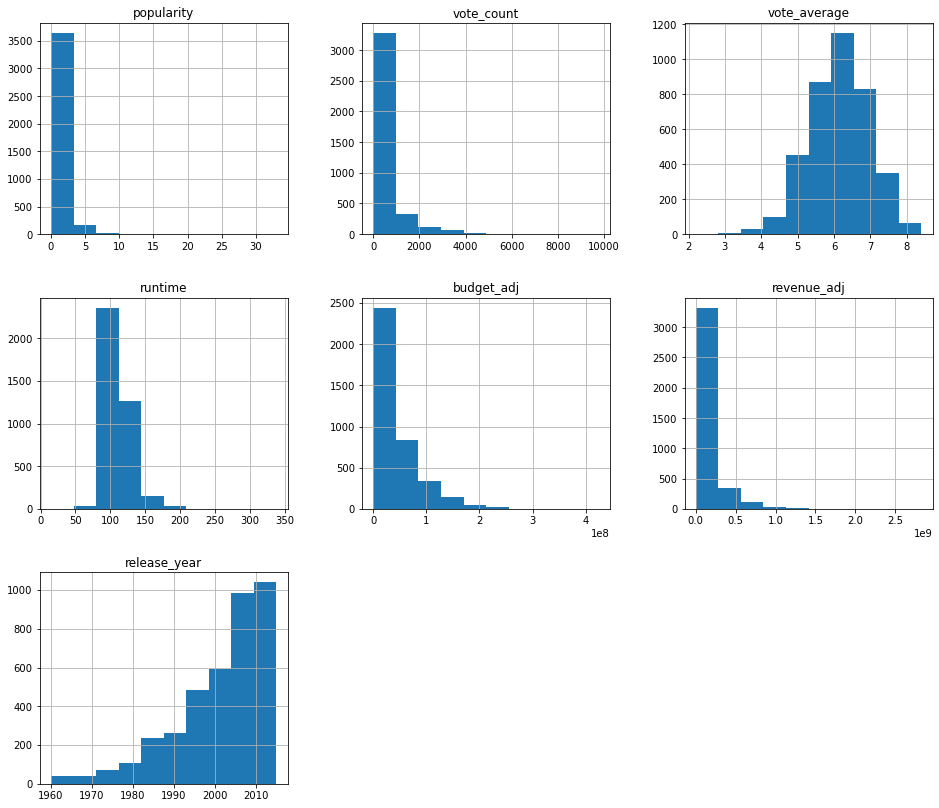

In [24]:
df.hist(figsize= (16,14));


In [25]:
def display_barplot_description (variable, xlabel, ylabel, title):
    """ Create a Histogram & show the description for one variable.
    Input:
    1. Variable : the name of the research column 
    2. Xlabel   : the x axis name
    3. ylabel   : the y axis name
    4. title    : the bar chart title
    Output:
    1. variable Bar chart 
    2. variable description """
    bar = df[variable].hist()
    head = plt.title(title)
    x = plt.xlabel(xlabel)
    y = plt.ylabel(ylabel);
    des = df[variable].describe()
    return "The description ",des,"The bar chart for {}".format(variable)

### Research Question 1 ( The most popular movie & the less popular movie?)

('The description ',
 count    3849.000000
 mean        1.192933
 std         1.475622
 min         0.001117
 25%         0.463337
 50%         0.798582
 75%         1.374300
 max        32.985763
 Name: popularity, dtype: float64,
 'The bar chart for popularity')

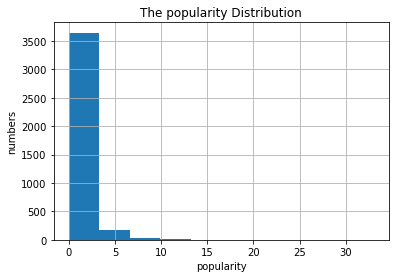

In [26]:
display_barplot_description ('popularity','popularity','numbers','The popularity Distribution' )

In [27]:
df.query("popularity == 32.985763 ")

,original_title,popularity,vote_count,vote_average,runtime,cast,director,genres,budget_adj,revenue_adj,release_year
0,Jurassic World,32.985763,5562,6.5,124,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,1.379999e+08,1.392446e+09,2015


In [28]:
df.query("popularity == 0.001117")

,original_title,popularity,vote_count,vote_average,runtime,cast,director,genres,budget_adj,revenue_adj,release_year
7268,Born into Brothels,0.001117,23,6.4,85,Zana Briski|Avijit|Geeta Masi|Kochi|Mamuni,Zana Briski|Ross Kauffman,Documentary,404055.889934,4.057946e+06,2004


**Result** 

+ Jurassic World is the most popular movie with vote count 5562 & vote averange 6.5.
+ Born into Brothels is the less popular movie with vote count 23 & vote average 6.4

### Research Question 2 ( The highest cost movie ?)

('The description ',
 count    3.849000e+03
 mean     4.429360e+07
 std      4.481360e+07
 min      9.693980e-01
 25%      1.316623e+07
 50%      3.005030e+07
 75%      6.076720e+07
 max      4.250000e+08
 Name: budget_adj, dtype: float64,
 'The bar chart for budget_adj')

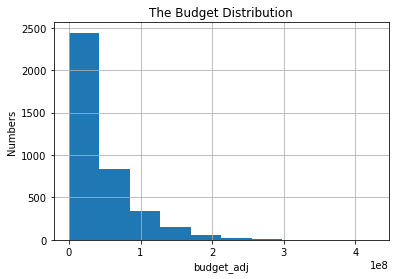

In [29]:
display_barplot_description('budget_adj','budget_adj','Numbers','The Budget Distribution')

In [30]:
df.query("budget_adj == 4.250000e+08")

,original_title,popularity,vote_count,vote_average,runtime,cast,director,genres,budget_adj,revenue_adj,release_year
2244,The Warrior's Way,0.25054,74,6.4,100,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,Adventure|Fantasy|Action|Western|Thriller,425000000.0,11087569.0,2010


**Result** The Warrior's Way is the highest cost movie

### Research Question 3 ( The highest Revenue movie ?)

('The description ',
 count    3.849000e+03
 mean     1.372313e+08
 std      2.162018e+08
 min      2.370705e+00
 25%      1.843023e+07
 50%      6.181393e+07
 75%      1.634115e+08
 max      2.827124e+09
 Name: revenue_adj, dtype: float64,
 'The bar chart for revenue_adj')

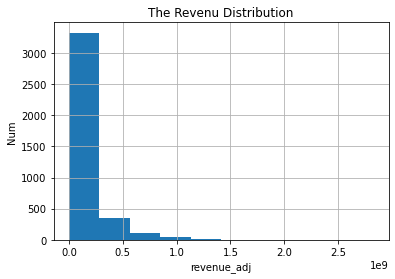

In [31]:
display_barplot_description('revenue_adj','revenue_adj','Num','The Revenu Distribution')

In [32]:
df[df['revenue_adj'] == df['revenue_adj'].max()]

,original_title,popularity,vote_count,vote_average,runtime,cast,director,genres,budget_adj,revenue_adj,release_year
1386,Avatar,9.432768,8458,7.1,162,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Action|Adventure|Fantasy|Science Fiction,2.408869e+08,2.827124e+09,2009


**Result** Avatar is the highest revenue movie

### Research Question 4 ( The highest Profit movie & the lowest profit movie ?)

In [33]:
# Create a new column 'profit'
df['profit'] = df['revenue_adj'] - df['budget_adj']
df.head(2)

,original_title,popularity,vote_count,vote_average,runtime,cast,director,genres,budget_adj,revenue_adj,release_year,profit
0,Jurassic World,32.985763,5562,6.5,124,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,1.379999e+08,1.392446e+09,2015,1.254446e+09
1,Mad Max: Fury Road,28.419936,6185,7.1,120,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,1.379999e+08,3.481613e+08,2015,2.101614e+08


('The description ',
 count    3.849000e+03
 mean     9.293772e+07
 std      1.941716e+08
 min     -4.139124e+08
 25%     -1.503317e+06
 50%      2.745198e+07
 75%      1.075480e+08
 max      2.750137e+09
 Name: profit, dtype: float64,
 'The bar chart for profit')

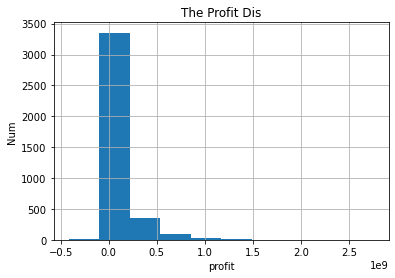

In [34]:
display_barplot_description('profit','profit','Num','The Profit Dis')

In [35]:
df[df['profit'] == df['profit'].max()]

,original_title,popularity,vote_count,vote_average,runtime,cast,director,genres,budget_adj,revenue_adj,release_year,profit
1329,Star Wars,12.037933,4428,7.9,121,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,Adventure|Action|Science Fiction,3.957559e+07,2.789712e+09,1977,2.750137e+09


In [36]:
df[df['profit'] == df['profit'].min()]

,original_title,popularity,vote_count,vote_average,runtime,cast,director,genres,budget_adj,revenue_adj,release_year,profit
2244,The Warrior's Way,0.25054,74,6.4,100,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,Adventure|Fantasy|Action|Western|Thriller,425000000.0,11087569.0,2010,-413912431.0


**Result** 

+ Star Wars is the highest profit movie with total earn = 2.750137e+09 $

+ The Warrior's Way is the lowest profit movie with total lost = 413,912,431 $

### Research Question 5 ( The distribution of the number of movies along years & The most production year?)

('The description ',
 count    3849.000000
 mean     2001.258249
 std        11.285642
 min      1960.000000
 25%      1995.000000
 50%      2004.000000
 75%      2010.000000
 max      2015.000000
 Name: release_year, dtype: float64,
 'The bar chart for release_year')

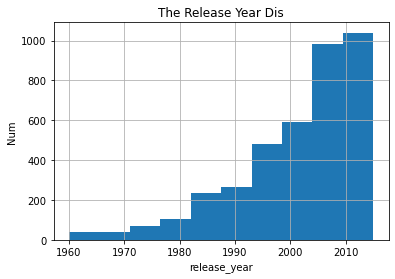

In [37]:
display_barplot_description('release_year','release_year','Num','The Release Year Dis')

In [38]:
df.release_year.value_counts()

2011    199
2013    180
2010    178
2009    174
2006    169
2008    166
2014    165
2007    164
2005    163
2015    160
2012    157
2004    147
2002    126
2001    121
2003    121
1999    116
2000    106
1998     92
1997     90
1996     86
1995     81
1993     72
1994     62
1988     56
1990     53
1992     53
1989     51
1991     50
1986     48
1987     46
1984     42
1985     41
1983     31
1981     30
1982     26
1980     23
1977     19
1978     17
1979     16
1976     15
1967     13
1974     13
1971     13
1973     12
1970     11
1961     10
1975      9
1968      9
1972      8
1962      7
1964      7
1963      6
1965      5
1966      5
1960      5
1969      4
Name: release_year, dtype: int64

**Result** 

+ the histogram shows that the distribution is left skewed & the number of movies increase by years.

+ 2011 the the most production year with total 199 movies.

### Research Question 6 ( The correlation between budget & both revenue & profit?)

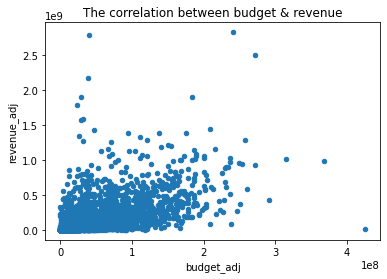

In [39]:
df.plot(x= 'budget_adj',y='revenue_adj',kind = 'scatter')
plt.title('The correlation between budget & revenue');

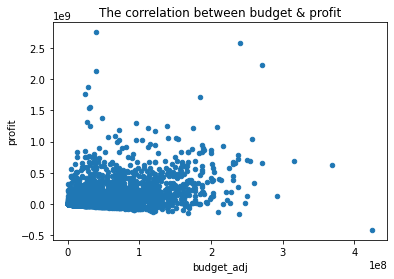

In [40]:
df.plot(x= 'budget_adj',y='profit',kind = 'scatter')
plt.title('The correlation between budget & profit');

**Result** 

+ budget has a positive correlation with revenue

+ budget has a negative correlation with profit

### Research Question 7 ( The correlation between Popularity &  profit?)

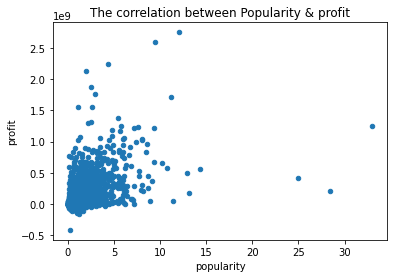

In [41]:
df.plot(x= 'popularity',y='profit',kind = 'scatter')
plt.title('The correlation between Popularity & profit');

**Result** 

+ Popularity has a positive correlation with profit

### Research Question 8  (? What kinds of properties are associated with movies that have high revenues?)

In [42]:
# get the median value for revenue
df['revenue_adj'].median()

61813934.3290779

In [43]:
# make a datafram for the high revenue movies
high_rev_movies = df.query('revenue_adj >= 61813934.3290779')

In [44]:
high_rev_movies.describe()

,popularity,vote_count,vote_average,runtime,budget_adj,revenue_adj,release_year,profit
count,1925.000000,1925.000000,1925.000000,1925.000000,1.925000e+03,1.925000e+03,1925.000000,1.925000e+03
mean,1.700074,869.858701,6.323688,113.634286,6.579147e+07,2.526144e+08,2000.103896,1.868229e+08
std,1.867953,1105.249289,0.740750,21.115937,5.023050e+07,2.579026e+08,12.127725,2.390512e+08
min,0.010335,10.000000,3.400000,69.000000,2.248029e+02,6.181393e+07,1960.000000,-1.551102e+08
25%,0.767389,201.000000,5.800000,98.000000,2.877829e+07,9.618890e+07,1994.000000,5.630712e+07
50%,1.207663,467.000000,6.300000,110.000000,5.200000e+07,1.634115e+08,2003.000000,1.075480e+08
75%,1.975304,1056.000000,6.900000,125.000000,9.036409e+07,3.066132e+08,2009.000000,2.235139e+08
max,32.985763,9767.000000,8.300000,248.000000,3.683713e+08,2.827124e+09,2015.000000,2.750137e+09


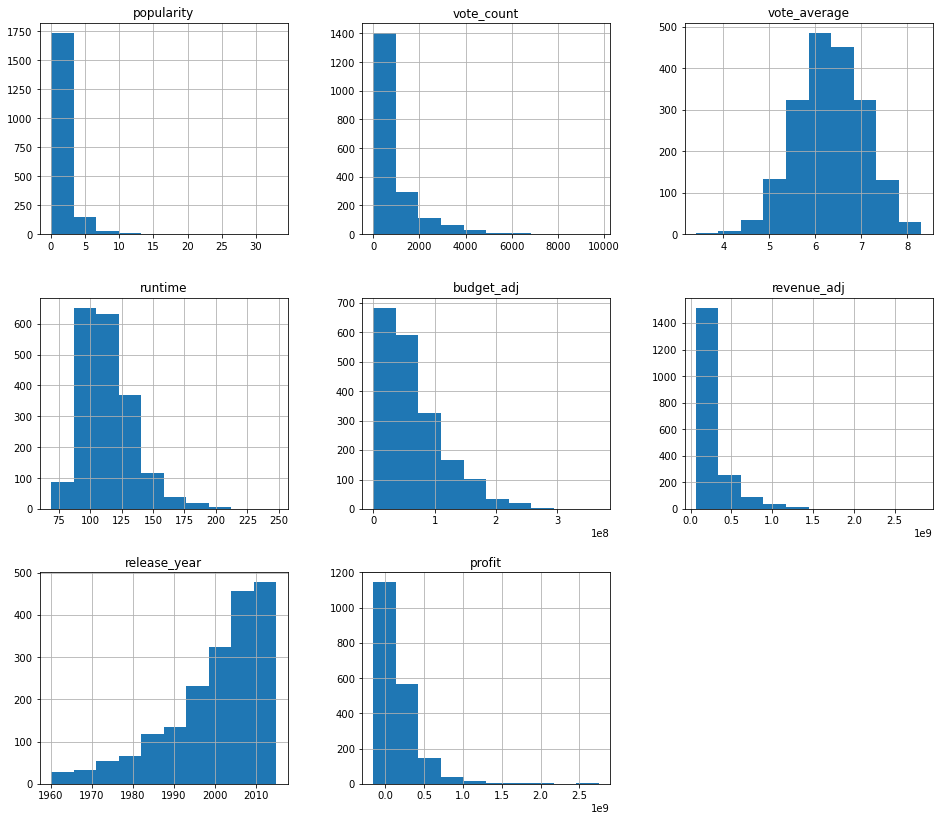

In [45]:
high_rev_movies.hist(figsize= (16,14));

**Result** 

+ dataset has 1925 high revenue movies with with average revenue = 2.526144e+08 dollar & average profit = 1.868229e+08 dollar


In [46]:
df.head()

,original_title,popularity,vote_count,vote_average,runtime,cast,director,genres,budget_adj,revenue_adj,release_year,profit
0,Jurassic World,32.985763,5562,6.5,124,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,1.379999e+08,1.392446e+09,2015,1.254446e+09
1,Mad Max: Fury Road,28.419936,6185,7.1,120,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,1.379999e+08,3.481613e+08,2015,2.101614e+08
2,Insurgent,13.112507,2480,6.3,119,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,1.012000e+08,2.716190e+08,2015,1.704191e+08
3,Star Wars: The Force Awakens,11.173104,5292,7.5,136,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,1.839999e+08,1.902723e+09,2015,1.718723e+09
4,Furious 7,9.335014,2947,7.3,137,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,1.747999e+08,1.385749e+09,2015,1.210949e+09


### Research Question 9  (Which director are most popular ??)

In [47]:
df.director.value_counts()

Steven Spielberg          27
Clint Eastwood            24
Ridley Scott              21
Woody Allen               18
Steven Soderbergh         17
                          ..
Wayne Wang|Paul Auster     1
Jean-FranÃ§ois Richet      1
Stewart Raffill            1
Vic Armstrong              1
Christopher Spencer        1
Name: director, Length: 1710, dtype: int64

**Result** 

+ Steven Spielberg is the most popular director with 27 movies


### Research Question 10  (Which genres are most popular from year to year???)

In [48]:
# convert geres column to string
genres_str = df['genres'].to_string(header= False,index=False)

In [49]:
# clean the genres_str
genres_str = genres_str.replace("\n",'|') # replace \n with | 
clean_genres_str = " ".join(genres_str.split()) # **  
clean_genres_str = clean_genres_str.replace(' ','') # remove the remaining spaces 

 ** get rid of all the duplicate whitespaces and newline characters (get the code from this [link](https://www.journaldev.com/23763/python-remove-spaces-from-string))

In [50]:
# make a list of genres
gen_list = clean_genres_str.split('|')

In [51]:
# create a dictionary with a genres as a keys & repetition as a values
genres_counter = {}
for gen in gen_list:
    if gen not in genres_counter:
        genres_counter[gen] = 1
    else:
        genres_counter[gen] += 1
        
genres_counter

{'Action': 1085,
 'Adventure': 748,
 'ScienceFiction': 519,
 'Thriller': 1202,
 'Fantasy': 396,
 'Crime': 651,
 'Western': 52,
 'Drama': 1753,
 'Family': 425,
 'Animation': 201,
 'Comedy': 1357,
 'Mystery': 344,
 'Romance': 666,
 'War': 119,
 'History': 129,
 'Music': 134,
 'Horror': 463,
 'Thri...': 1,
 'Documentary': 31,
 'Foreign': 12,
 'Adven...': 1,
 'TVMovie': 1}

In [52]:
# get the Max repeated genre 
max(genres_counter,key= genres_counter.get)

'Drama'

**Result** 

+ Drama is the most popular genre with 1753 movies 


<a id='conclusions'></a>
## Conclusions

> #### **After assessing,cleaning & analyzing TMDb movie dataset I found the following results **:

+ The dataset have total 3849 completed data movies, gathered for movies in time between 1960 to 2015, with average budget 4.429360e+07	dollars & average revenue 1.372313e+08 dollars take in consideration that the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time. 

+ also found that Jurassic World is the most popular movie with vote count 5562 & vote averange 6.5 & Born into Brothels is the less popular movie with vote count 23 & vote average 6.4

+ The Warrior's Way is the highest cost movie & Avatar is the highest revenue movie 
+ Star Wars is the highest profit movie with total earn = 2.750137e+09 dollar & The Warrior's Way is the lowest profit movie with total lost = 413,912,431 dollar
+ The release year distribution is left skewed & the number of movies increase by years. also 2011 the the most production year with total 199 movies.
+ budget has a positive correlation with revenue & a negative correlation with profit
+ Popularity has a positive correlation with profit
+ The dataset for the most highly revenue movies has 1925 movies with average revenue = 2.526144e+08 dollar & average profit = 1.868229e+08 dollar
+ Steven Spielberg is the most popular director with 27 movies
+ Drama is the most popular genre with 1753 movies
> #### **Limitations **:
+ Drop duplicated columns

+ Drop columnes which no need for it in analysis ('imdb_id','id','homepage','tagline','keywords','overview','release_date','budget','revenue','production_companies')

+ Drop any rows in dataset that contain missing values

+ Drop any rows in dataset that contain 0 value in (budget_adj,revenue_adj & runtime)
